In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import date
import yfinance as yf

# Loading data

In [18]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):  #function to load dataset
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data
data = load_data('AMZN') #hdfc
df=data
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
1,2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2,2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
3,2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
4,2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...,...
3564,2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500
3565,2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300
3566,2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900
3567,2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300


In [19]:
df = df.drop(['Date', 'Adj Close'], axis = 1)   #dropping columns that may not contribute to the model
df.head()

,Open,High,Low,Close,Volume
0,6.8125,6.8305,6.6570,6.6950,151998000
1,6.6715,6.7740,6.5905,6.7345,177038000
2,6.7300,6.7365,6.5825,6.6125,143576000
3,6.6005,6.6160,6.4400,6.5000,220604000
4,6.5280,6.6840,6.4515,6.6760,196610000


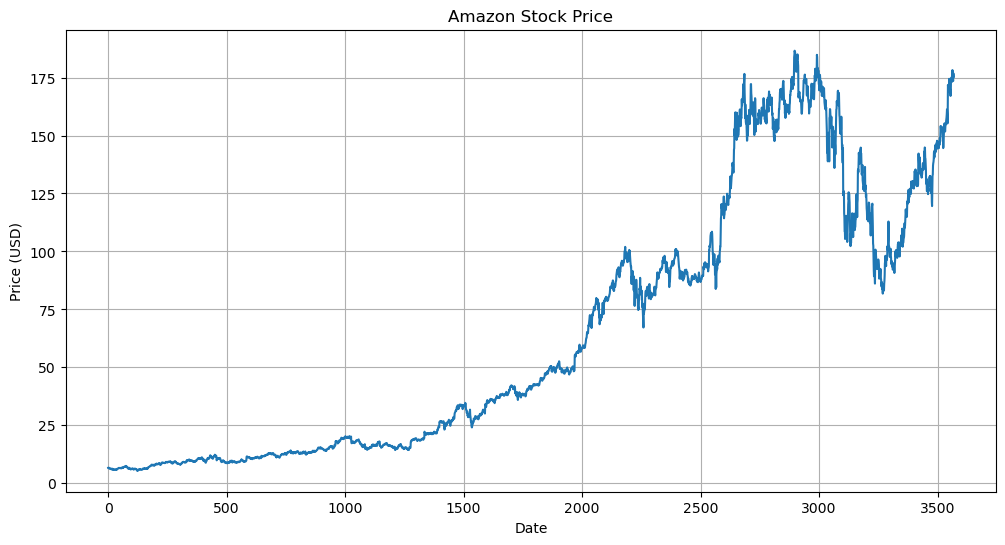

In [20]:
plt.figure(figsize=(12, 6)) #plotting stock price vs date
plt.plot(df['Close'])
plt.title("Amazon Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

# Train set and Test set splitting

In [21]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)]) #70 percent of data as train dataset
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])  #remaining as test data set

print(train.shape)
print(test.shape)

(2498, 7)
(1071, 7)


# Preprocessing

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, 4:5].values #taking close data
test_close = test.iloc[:, 4:5].values   #taking close data
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01309752],
       [0.01350665],
       [0.012243  ],
       ...,
       [0.86643016],
       [0.86040188],
       [0.855601  ]])

In [23]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]): #100th datapoint to end
    x_train.append(data_training_array[i-100: i]) #100 steps
    y_train.append(data_training_array[i, 0])     ##adding i'th stock price

x_train, y_train = np.array(x_train), np.array(y_train)  #array

In [24]:
x_train.shape

(2398, 100, 1)

# Model Training

In [27]:
#from tensorflow.keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras.models import Sequential
#model = Sequential()  #empty neural network
#model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
 #             ,input_shape = (x_train.shape[1], 1)))  #  50 memory units matches input shape,1   rectified linear unit activation   returns sequences instead of output
#model.add(Dropout(0.2))  #dropout(set to zero) 0.2 of layer to prevent overfitting


#model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))  #60 units 30% dropout
#model.add(Dropout(0.3))


#model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))  #80 units 40% dropout
#model.add(Dropout(0.4))


#model.add(LSTM(units = 120, activation = 'relu'))  #120 units and output
#model.add(Dropout(0.5))

#model.add(Dense(units = 1))  #output layer

In [28]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))


model.add(LSTM(units=50))

model.add(Dense(50))

model.add(Dense(1))

In [29]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,batch_size=64,epochs = 100)

Epoch 1/100
38/38 [==============================] - 8s 139ms/step - loss: 0.0195 - mean_absolute_error: 0.0813
Epoch 2/100
38/38 [==============================] - 5s 119ms/step - loss: 4.5971e-04 - mean_absolute_error: 0.0135
Epoch 3/100
38/38 [==============================] - 4s 104ms/step - loss: 3.2421e-04 - mean_absolute_error: 0.0111
Epoch 4/100
38/38 [==============================] - 3s 81ms/step - loss: 3.1731e-04 - mean_absolute_error: 0.0107
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 3.2165e-04 - mean_absolute_error: 0.0109
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 3.0666e-04 - mean_absolute_error: 0.0105
Epoch 7/100
38/38 [==============================] - 4s 93ms/step - loss: 3.3815e-04 - mean_absolute_error: 0.0111
Epoch 8/100
38/38 [==============================] - 3s 74ms/step - loss: 3.1212e-04 - mean_absolute_error: 0.0105
Epoch 9/100
38/38 [==============================] - 4s 98ms/step - loss: 3.048

model.save('keras_model.h5')
test_close.shape

# Predicted vs Actual Prices

past_100_days = pd.DataFrame(train_close[-100:])  #last 100 days
test_df = pd.DataFrame(test_close)  #test stock prices


In [32]:
final_df = past_100_days.append(test_df, ignore_index = True)
final_df.head()

C:\Users\joshu\AppData\Local\Temp\ipykernel_22136\538140686.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


,0
0,100.495003
1,99.601501
2,98.894997
3,98.225998
4,99.281502


In [33]:
input_data = scaler.fit_transform(final_df)   
input_data

array([[0.17828081],
       [0.169751  ],
       [0.16300636],
       ...,
       [0.875318  ],
       [0.90691702],
       [0.89288366]])

In [34]:
input_data.shape


(1171, 1)

In [35]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):  #100 to previous 100 
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1071, 100, 1)
(1071,)


In [37]:
y_pred = model.predict(x_test)


34/34 [==============================] - 2s 35ms/step


In [38]:
y_pred.shape


(1071, 1)

In [39]:
scaler.scale_  #scaling factor


array([0.00954649])

In [40]:
scale_factor = 1/0.00653061   
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

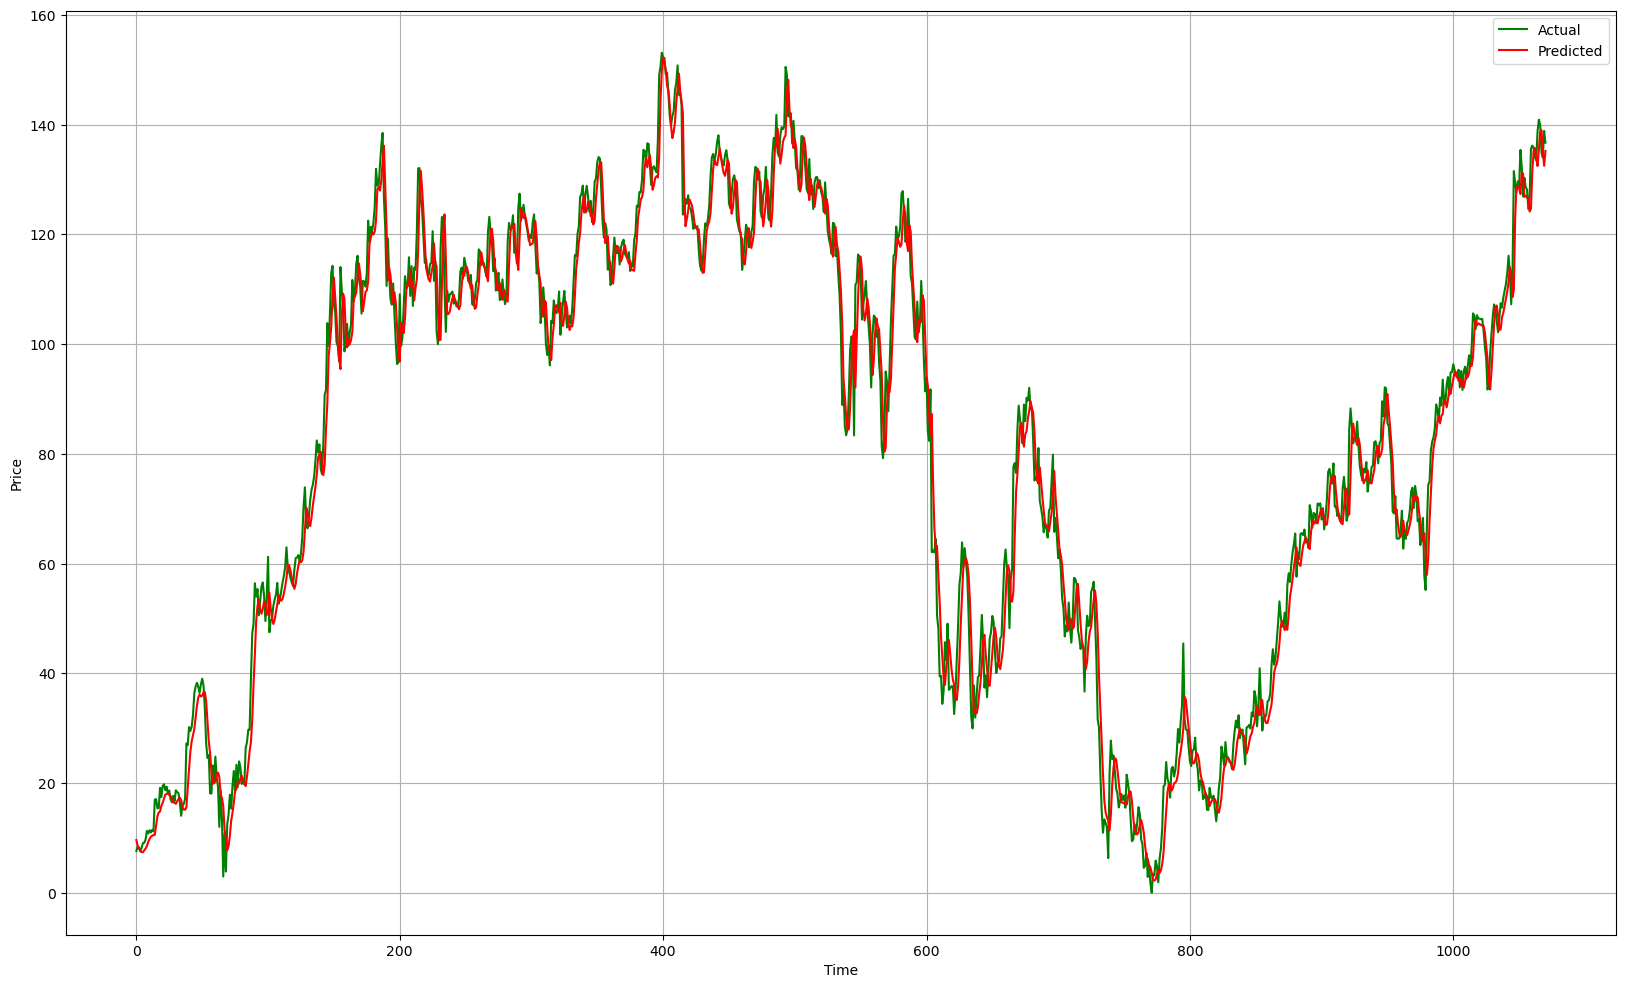

In [41]:
plt.figure(figsize = (20,12))
plt.plot(y_test, 'g', label = "Actual")
plt.plot(y_pred, 'r', label = "Predicted")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
y_pred_1d = y_pred.ravel()  # Assuming y_pred is a 1d NumPy array
y_test_1d = y_test.ravel()  # Assuming y_test is a 1d NumPy array
data1 = {'prediction': y_pred_1d, 'Actual': y_test_1d}
df1 = pd.DataFrame(data1)
df1

,prediction,Actual
0,9.599107,7.607249
1,8.572033,8.420014
2,8.021029,8.267255
3,7.738229,7.514425
4,7.416563,8.209507
...,...,...
1066,138.617538,139.982682
1067,139.003647,134.924819
1068,135.103378,134.033115
1069,132.511566,138.871716


# Metrics

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.78%


In [44]:
from sklearn.metrics import r2_score

actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)

print("r2 score:", r2) #accuracy of model

r2 score: 0.9840241965503161


In [45]:
df_test=load_data('AMZN')
df_test=df_test.drop(['Date','Open','High','Low','Adj Close','Volume'],axis=1)
test_value=df_test[-60:].values
test_value=scaler.fit_transform(test_value)
test=[]
test.append(test_value)

[*********************100%%**********************]  1 of 1 completed


In [46]:
test=np.array(test)
test

array([[[0.08647813],
        [0.1268942 ],
        [0.08469514],
        [0.16047533],
        [0.28231803],
        [0.27399666],
        [0.22436818],
        [0.27548264],
        [0.26300126],
        [0.26270425],
        [0.26062379],
        [0.26181275],
        [0.21901921],
        [0.15928637],
        [0.1158988 ],
        [0.        ],
        [0.0199108 ],
        [0.13462109],
        [0.20207991],
        [0.27221367],
        [0.31530423],
        [0.2986624 ],
        [0.25527483],
        [0.21218427],
        [0.26537873],
        [0.32005917],
        [0.30341733],
        [0.34026743],
        [0.36552719],
        [0.3916789 ],
        [0.43239199],
        [0.49598782],
        [0.42882601],
        [0.31589871],
        [0.43714693],
        [0.80950951],
        [0.76493298],
        [0.73046036],
        [0.77147091],
        [0.75096563],
        [0.88796419],
        [0.82525985],
        [0.7153045 ],
        [0.78484378],
        [0.74977713],
        [0

In [47]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))
tomorrow_prediction=model.predict(test)
tomorrow_prediction

1/1 [==============================] - 1s 594ms/step


array([[0.9077915]], dtype=float32)

In [48]:
tomorrow_prediction=scaler.inverse_transform(tomorrow_prediction)
tomorrow_prediction #accurate

array([[175.11719]], dtype=float32)

In [49]:
conda list


# packages in environment at C:\Users\joshu\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
absl-py                   2.0.0                    pypi_0    pypi
aiohttp                   3.8.6                    pypi_0    pypi
aiosignal                 1.3.1                    pypi_0    pypi
alabaster                 0.7.12             pyhd3eb1b0_0  
alpha-vantage             2.3.1                    pypi_0    pypi
anaconda                  2022.10                  py39_0  
anaconda-client           1.11.0           py39haa95532_0  
anaconda-navigator        2.3.1            py39haa95532_0  
anaconda-project          0.11.1           py39haa95532_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow       